In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point

In [2]:
##zipcodes = gpd.read_file('../data/zipcodes.geojson')
#print(zipcodes.crs)

better_health = gpd.read_file('../data/Better_Health_Data_2024_release_20241202.geojson')
##print(better_health)
better_health.head()

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,...,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,3.4,%,3.7,Stroke,Alabama,91336,01015,2022,4.0,...,None,Age-adjusted prevalence,None,Calhoun,Health Outcomes,AgeAdjPrv,STROKE,BRFSS,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,...,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,...,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)


In [3]:
better_health.loc[(better_health.statedesc=='United States') & (better_health.short_question_text=='Diabetes')]

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
5984,Diagnosed diabetes among adults,10.2,%,10.4,Diabetes,United States,260836730,59,2022,10.6,...,None,Age-adjusted prevalence,None,None,Health Outcomes,AgeAdjPrv,DIABETES,BRFSS,333287557,None


In [4]:
better_health.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
pd.set_option('display.max.columns', 22)
#pd.set_option('display.max.rows', 22)

In [6]:
better_health = better_health.loc[better_health.data_value_type=='Crude prevalence']
better_health

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,categoryid,stateabbr,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,HLTHOUT,US,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,DISABLT,AL,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,HLTHOUT,AL,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,HLTHOUT,AL,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)
6,Short sleep duration among adults,33.6,%,40.3,Short Sleep Duration,Alabama,54954,01049,2022,47.2,RISKBEH,AL,None,Crude prevalence,None,DeKalb,Health Risk Behaviors,CrdPrv,SLEEP,BRFSS,71998,POINT (-85.80397 34.45986)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240876,Diagnosed diabetes among adults,10.0,%,11.5,Diabetes,Wisconsin,64819,55071,2022,13.2,HLTHOUT,WI,None,Crude prevalence,None,Manitowoc,Health Outcomes,CrdPrv,DIABETES,BRFSS,81172,POINT (-87.80959 44.11996)
240879,Stroke among adults,3.3,%,3.7,Stroke,Wisconsin,82265,55039,2022,4.0,HLTHOUT,WI,None,Crude prevalence,None,Fond du Lac,Health Outcomes,CrdPrv,STROKE,BRFSS,103836,POINT (-88.48834 43.75361)
240881,High blood pressure among adults,29.9,%,34.3,High Blood Pressure,Wisconsin,36755,55095,2021,38.8,HLTHOUT,WI,None,Crude prevalence,None,Polk,Health Outcomes,CrdPrv,BPHIGH,BRFSS,45709,POINT (-92.44128 45.46151)
240884,Self-care disability among adults,2.9,%,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,DISABLT,WI,None,Crude prevalence,None,Marathon,Disability,CrdPrv,SELFCARE,BRFSS,137958,POINT (-89.75886 44.89830)


In [7]:
better_health.totalpopulation = better_health.totalpopulation.astype(int)
better_health.totalpopulation

0         333287557
1             24706
3             34088
4             14198
6             71998
            ...    
240876        81172
240879       103836
240881        45709
240884       137958
240885        39472
Name: totalpopulation, Length: 120443, dtype: int64

In [8]:
better_health.columns

Index(['measure', 'low_confidence_limit', 'data_value_unit', 'data_value',
       'short_question_text', 'statedesc', 'totalpop18plus', 'locationid',
       'year', 'high_confidence_limit', 'categoryid', 'stateabbr',
       'data_value_footnote', 'data_value_type', 'data_value_footnote_symbol',
       'locationname', 'category', 'datavaluetypeid', 'measureid',
       'datasource', 'totalpopulation', 'geometry'],
      dtype='object')

In [9]:
better_health.loc[better_health.statedesc=='Delaware']['locationname']

76             Kent
18273          Kent
18420        Sussex
18704    New Castle
19173        Sussex
            ...    
35491          Kent
35552        Sussex
35751    New Castle
35774          Kent
35788        Sussex
Name: locationname, Length: 120, dtype: object

In [10]:
better_health.groupby(['statedesc','year'])['totalpopulation'].sum()

statedesc      year
Alabama        2021     20297184
               2022    182674656
Alaska         2021      2934332
               2022     26408988
Arizona        2021     29436788
                         ...    
West Virginia  2022     63905616
Wisconsin      2021     23570156
               2022    212131404
Wyoming        2021      2325524
               2022     20929716
Name: totalpopulation, Length: 103, dtype: int64

In [11]:
better_health

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,categoryid,stateabbr,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,HLTHOUT,US,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,DISABLT,AL,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,HLTHOUT,AL,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,HLTHOUT,AL,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)
6,Short sleep duration among adults,33.6,%,40.3,Short Sleep Duration,Alabama,54954,01049,2022,47.2,RISKBEH,AL,None,Crude prevalence,None,DeKalb,Health Risk Behaviors,CrdPrv,SLEEP,BRFSS,71998,POINT (-85.80397 34.45986)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240876,Diagnosed diabetes among adults,10.0,%,11.5,Diabetes,Wisconsin,64819,55071,2022,13.2,HLTHOUT,WI,None,Crude prevalence,None,Manitowoc,Health Outcomes,CrdPrv,DIABETES,BRFSS,81172,POINT (-87.80959 44.11996)
240879,Stroke among adults,3.3,%,3.7,Stroke,Wisconsin,82265,55039,2022,4.0,HLTHOUT,WI,None,Crude prevalence,None,Fond du Lac,Health Outcomes,CrdPrv,STROKE,BRFSS,103836,POINT (-88.48834 43.75361)
240881,High blood pressure among adults,29.9,%,34.3,High Blood Pressure,Wisconsin,36755,55095,2021,38.8,HLTHOUT,WI,None,Crude prevalence,None,Polk,Health Outcomes,CrdPrv,BPHIGH,BRFSS,45709,POINT (-92.44128 45.46151)
240884,Self-care disability among adults,2.9,%,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,DISABLT,WI,None,Crude prevalence,None,Marathon,Disability,CrdPrv,SELFCARE,BRFSS,137958,POINT (-89.75886 44.89830)


In [12]:
better_health.columns

Index(['measure', 'low_confidence_limit', 'data_value_unit', 'data_value',
       'short_question_text', 'statedesc', 'totalpop18plus', 'locationid',
       'year', 'high_confidence_limit', 'categoryid', 'stateabbr',
       'data_value_footnote', 'data_value_type', 'data_value_footnote_symbol',
       'locationname', 'category', 'datavaluetypeid', 'measureid',
       'datasource', 'totalpopulation', 'geometry'],
      dtype='object')

In [13]:
better_health_df1=better_health.drop(columns =['low_confidence_limit','locationid','high_confidence_limit',
                                               'data_value_footnote','data_value_footnote_symbol', 'data_value_type', 'datavaluetypeid',
                                               'measureid', 'datasource','totalpop18plus','measure', 'data_value_unit','categoryid'])
better_health_df1.head()          


,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [14]:
df_USA = better_health_df1[better_health_df1.statedesc=='United States'].reset_index(drop=True)
df_USA

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,13.4,Cognitive Disability,United States,2022,US,None,Disability,333287557,None
2,10.8,Health Insurance,United States,2022,US,None,Prevention,333287557,None
3,8.2,Cancer (non-skin) or Melanoma,United States,2022,US,None,Health Outcomes,333287557,None
4,23.7,Physical Inactivity,United States,2022,US,None,Health Risk Behaviors,333287557,None
5,17.9,General Health,United States,2022,US,None,Health Status,333287557,None
6,6.8,COPD,United States,2022,US,None,Health Outcomes,333287557,None
7,31.9,Social Isolation,United States,2022,US,None,Health-Related Social Needs,333287557,None
8,6.8,Coronary Heart Disease,United States,2022,US,None,Health Outcomes,333287557,None
9,35.5,High Cholesterol,United States,2021,US,None,Health Outcomes,333287557,None


In [15]:
my_list= ['Diabetes','Cognitive Disability','Cancer (non-skin) or Melanoma','Stroke','High Blood Pressure','Arthritis','Depression','Obesity']

df_USA_Categories = df_USA.loc[df_USA.short_question_text.isin(my_list)].reset_index(drop = True)
df_USA_Categories


,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,13.4,Cognitive Disability,United States,2022,US,None,Disability,333287557,None
2,8.2,Cancer (non-skin) or Melanoma,United States,2022,US,None,Health Outcomes,333287557,None
3,3.6,Stroke,United States,2022,US,None,Health Outcomes,333287557,None
4,32.7,High Blood Pressure,United States,2021,US,None,Health Outcomes,333287557,None
5,26.6,Arthritis,United States,2022,US,None,Health Outcomes,333287557,None
6,33.3,Obesity,United States,2022,US,None,Health Outcomes,333287557,None
7,20.7,Depression,United States,2022,US,None,Health Outcomes,333287557,None


In [16]:
type(df_USA_Categories)

geopandas.geodataframe.GeoDataFrame

In [17]:
df_USA_Categories.to_csv('../data/df_USA_Categories.csv')

In [18]:
df_USA_Categories=pd.read_csv('../data/df_USA_Categories.csv')
df_USA_Categories

,Unnamed: 0,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,0,12.0,Diabetes,United States,2022,US,NaN,Health Outcomes,333287557,NaN
1,1,13.4,Cognitive Disability,United States,2022,US,NaN,Disability,333287557,NaN
2,2,8.2,Cancer (non-skin) or Melanoma,United States,2022,US,NaN,Health Outcomes,333287557,NaN
3,3,3.6,Stroke,United States,2022,US,NaN,Health Outcomes,333287557,NaN
4,4,32.7,High Blood Pressure,United States,2021,US,NaN,Health Outcomes,333287557,NaN
5,5,26.6,Arthritis,United States,2022,US,NaN,Health Outcomes,333287557,NaN
6,6,33.3,Obesity,United States,2022,US,NaN,Health Outcomes,333287557,NaN
7,7,20.7,Depression,United States,2022,US,NaN,Health Outcomes,333287557,NaN


In [19]:
type(df_USA_Categories)

pandas.core.frame.DataFrame

In [20]:
df_USA_7Categories=df_USA_Categories[['data_value','short_question_text']].sort_values(by='data_value', ascending = False)
#candy_df=candy_df.rename(columns={'name':'Name', 'state':'State', '2nd_place_pounds': 'Second_place_pounds', '3rd_place_pounds':'Third_place_pounds', 'top_candy':'Top_candy', 'top_candy_pounds': 'Top_candy_pounds'})
#candy_df.head(3)
df_USA_7Categories=df_USA_7Categories.rename(columns={'data_value':'Percentage','short_question_text': 'Category'})
df_USA_7Categories

,Percentage,Category
6,33.3,Obesity
4,32.7,High Blood Pressure
5,26.6,Arthritis
7,20.7,Depression
1,13.4,Cognitive Disability
0,12.0,Diabetes
2,8.2,Cancer (non-skin) or Melanoma
3,3.6,Stroke


In [21]:
#plt.pie(category_counts['count'],labels = category_counts['lenght_category'])
#plt.title("Length Categories");

In [22]:
df_USA_7Categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 6 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Percentage  8 non-null      float64
 1   Category    8 non-null      object 
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


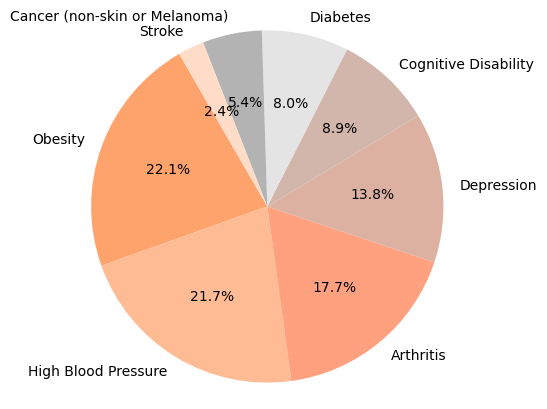

In [23]:
categories = ['Obesity', 'High Blood Pressure', 'Arthritis','Depression','Cognitive Disability', 'Diabetes', 'Cancer (non-skin or Melanoma)', 'Stroke']
Total = [33.3, 32.7, 26.6, 20.7 , 13.4, 12.0, 8.2, 3.6]
colors = ['#ffa36d','#ffbc94','#ffa17f', '#dcb1a2', '#d2b6ac', '#e4e4e4', '#b3b3b3','#ffdcc7',] 
plt.figure(figsize=(5, 5))
plt.pie(Total, labels= categories, startangle=120, colors=colors, autopct='%1.1f%%') #,autopct='%1.1f%%',# Title
#plt.title('Top Eight Chronic Diseases')# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig("TPH_2324.png", transparent=True)
plt.show() #(edited) 


In [24]:
my_list2= ['Current Cigarette Smoking','Binge Drinking','Physical Inactivity']
#df_USA_7Categories=df_USA_7Categories.rename(columns={'data_value':'Percentage','short_question_text': 'Category'})
#df_USA_7Categories
df_USA_Risks = df_USA.loc[df_USA.short_question_text.isin(my_list2)].reset_index(drop = True)
df_USA_Risks=df_USA_Risks.rename(columns={'data_value':'Percentage','short_question_text': 'Category'})


In [25]:
type(df_USA_Risks)


geopandas.geodataframe.GeoDataFrame

In [26]:
df_USA_Risks.to_csv('../data/df_USA_Risks.csv')

In [27]:
df_USA_Risks=pd.read_csv('../data/df_USA_Risks.csv')
df_USA_Risks

,Unnamed: 0,Percentage,Category,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,0,23.7,Physical Inactivity,United States,2022,US,NaN,Health Risk Behaviors,333287557,NaN
1,1,12.9,Current Cigarette Smoking,United States,2022,US,NaN,Health Risk Behaviors,333287557,NaN
2,2,16.6,Binge Drinking,United States,2022,US,NaN,Health Risk Behaviors,333287557,NaN


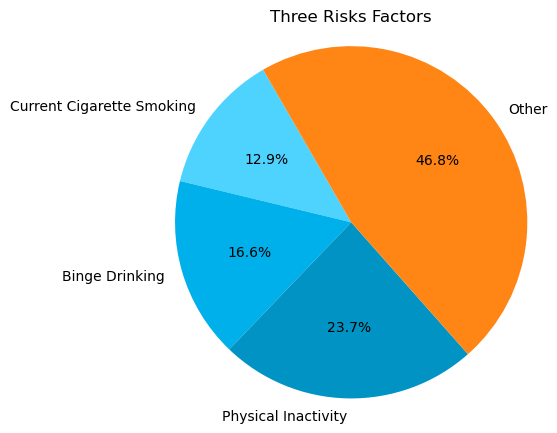

In [28]:
categories = ['Current Cigarette Smoking','Binge Drinking','Physical Inactivity','Other']
Total = [12.9, 16.6, 23.7, 46.8]
colors = ['#4ed3ff', '#00b0eb','#0093c4', '#ff8514'] #, '#d2b6ac', '#e4e4e4', '#b3b3b3','#ffdcc7',] 
plt.figure(figsize=(5, 5))
plt.pie(Total, labels= categories, startangle=120, colors=colors, autopct='%1.1f%%') #,autopct='%1.1f%%',# Title
plt.title('Three Risks Factors')# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig("TPH_2324.png", transparent=True)
plt.show() #(edited) 


Select 7 specific categories that you are focused on for United States and make a graph from it..., then make graphs for each category...

In [29]:
#My_list=[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984]
#year_duration_specific_years=year_duration.loc[year_duration.release_year.isin(My_list)].agg(['min','max','mean'])
#year_duration_specific_years


In [30]:
better_health_df1['short_question_text']=better_health_df1['short_question_text'].astype(str)
better_health_df1.head(2)

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [31]:
type(better_health_df1)

geopandas.geodataframe.GeoDataFrame

In [32]:
better_health_df1.shape

(120443, 9)

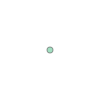

In [33]:
better_health_df1.loc[1,'geometry']

In [34]:
print(better_health_df1.loc[1, 'geometry'])

POINT (-85.3928136383141 31.8698172860413)


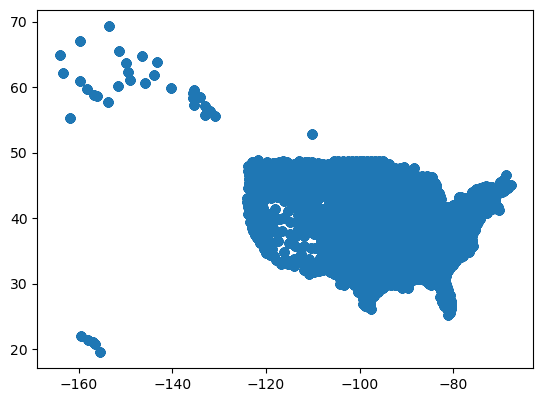

In [35]:
better_health_df1.plot();

In [36]:
better_health_df1.head()

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [37]:
better_health_df1=better_health_df1.rename(columns={'measure':'Measure','data_value':'Data','short_question_text': 'Category','statedesc':'State', 'totalpop18plus': '18plus', 'year':'Year',
                                  'categoryid':'Category_ID','stateabbr': 'St_Abbr','locationname': 'Location', 'category':'Group',
                                  'totalpopulation':'Population','geometry':'Geometry'})
better_health_df1.head()


,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [38]:
better_health_df1.Category.value_counts()

Category
Diabetes                            3145
Hearing Disability                  3145
Stroke                              3145
Short Sleep Duration                3145
Cancer (non-skin) or Melanoma       3145
Frequent Physical Distress          3145
Health Insurance                    3145
Arthritis                           3145
Cognitive Disability                3145
Mobility Disability                 3145
Any Disability                      3145
Depression                          3145
Annual Checkup                      3145
Obesity                             3145
Coronary Heart Disease              3145
Current Asthma                      3145
Vision Disability                   3145
Binge Drinking                      3145
COPD                                3145
Self-care Disability                3145
Mammography                         3145
Current Cigarette Smoking           3145
Dental Visit                        3145
Independent Living Disability       3145
All Tee

In [39]:
better_health_df1['Data']=better_health_df1['Data'].astype(float)
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [40]:
better_health_df1['Population']=better_health_df1['Population'].astype(int)
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [41]:
better_health_df1['Total'] =((better_health_df1.Population * better_health_df1.Data)/100).astype('int')
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982),2371
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986),29015


In [42]:
better_health_df1_Stroke = better_health_df1.loc[better_health_df1['Category'] == 'Stroke'].reset_index(drop=True).round()
better_health_df1_Stroke.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,6.0,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
1,5.0,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
2,4.0,Stroke,Arkansas,2022,AR,Crawford,Health Outcomes,61075,POINT (-94.24242 35.58843),2748
3,6.0,Stroke,Arkansas,2022,AR,Monroe,Health Outcomes,6564,POINT (-91.20392 34.67785),420
4,4.0,Stroke,California,2022,CA,Inyo,Health Outcomes,18718,POINT (-117.41111 36.51142),730


In [43]:
better_health_df1_Stroke.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Data        3145 non-null   float64 
 1   Category    3145 non-null   object  
 2   State       3145 non-null   object  
 3   Year        3145 non-null   object  
 4   St_Abbr     3145 non-null   object  
 5   Location    3144 non-null   object  
 6   Group       3145 non-null   object  
 7   Population  3145 non-null   int64   
 8   Geometry    3144 non-null   geometry
 9   Total       3145 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(6)
memory usage: 245.8+ KB


In [44]:
#candy_df['Name']=candy_df['Name'].astype(str)
#candy_df.head()
#better_health_df1_Stroke['Data']=better_health_df1_Stroke['Data'].astype(float)
better_health_df1_Stroke_TN = better_health_df1_Stroke.loc[better_health_df1_Stroke.State=='Tennessee'].reset_index(drop = True)
better_health_df1_Stroke_TN.head(5)

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,5.0,Stroke,Tennessee,2022,TN,Bledsoe,Health Outcomes,14798,POINT (-85.20485 35.59673),784
1,5.0,Stroke,Tennessee,2022,TN,Carroll,Health Outcomes,28458,POINT (-88.45022 35.97313),1337
2,5.0,Stroke,Tennessee,2022,TN,Rhea,Health Outcomes,33730,POINT (-84.92436 35.60898),1753
3,4.0,Stroke,Tennessee,2022,TN,Franklin,Health Outcomes,43942,POINT (-86.09187 35.15495),1933
4,5.0,Stroke,Tennessee,2022,TN,Johnson,Health Outcomes,18086,POINT (-81.85198 36.45455),940


In [45]:
#better_health_df1_Stroke['Population']=better_health_df1_Stroke['Population'].astype(int)
#better_health_df1_Stroke.head(2)

In [46]:
better_health_df1_Stroke.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Data        3145 non-null   float64 
 1   Category    3145 non-null   object  
 2   State       3145 non-null   object  
 3   Year        3145 non-null   object  
 4   St_Abbr     3145 non-null   object  
 5   Location    3144 non-null   object  
 6   Group       3145 non-null   object  
 7   Population  3145 non-null   int64   
 8   Geometry    3144 non-null   geometry
 9   Total       3145 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(6)
memory usage: 245.8+ KB


In [47]:
Stroke=better_health_df1_Stroke[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Stroke.head(10)


,State,Total
1,California,1226481
2,Texas,1000176
3,Florida,912508
4,New York,661298
5,Pennsylvania,475785
6,Ohio,450266
7,Illinois,426399
8,Georgia,408217
9,North Carolina,403943
10,Michigan,368265


In [48]:
better_health_df1_Stroke[better_health_df1_Stroke.State =='United States']

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
149,4.0,Stroke,United States,2022,US,None,Health Outcomes,333287557,None,11998352


In [49]:
#Stroke.head(10).plot.bar(x= 'State', y='Total', color=['lightgreen'])
#plt.title('Stroke Top 10 States')
#plt.ylabel ('Total') 
#plt.ticklabel_format(style='plain', axis='y')
              

Note for myslelf: Let's look at heart disease as well

In [50]:
Cancer = better_health_df1.loc[better_health_df1['Category'] == 'Cancer (non-skin) or Melanoma'].reset_index(drop=True).round()
Cancer.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,9.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Etowah,Health Outcomes,103088,POINT (-86.03493 34.04514),9381
1,9.0,Cancer (non-skin) or Melanoma,Arkansas,2022,AR,Saline,Health Outcomes,127357,POINT (-92.67652 34.64665),11716
2,8.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Mobile,Health Outcomes,411411,POINT (-88.20641 30.77917),31678
3,6.0,Cancer (non-skin) or Melanoma,California,2022,CA,Los Angeles,Health Outcomes,9721138,POINT (-118.22455 34.32138),583268
4,8.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Dale,Health Outcomes,49544,POINT (-85.61093 31.43166),4112


In [51]:
Cancer = Cancer[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(11)
Cancer.head(10)    


,State,Total
1,California,2630957
2,Florida,2041029
3,Texas,1888815
4,New York,1472875
5,Pennsylvania,1138401
6,Ohio,1020081
7,Illinois,956855
8,Michigan,869942
9,North Carolina,835275
10,Georgia,784263


In [52]:
#Cancer.plot.bar(x= 'State', y='Total', color=['lightgreen'])
#plt.title('Cancer Top 10 States')
#plt.ylabel ('Total') 
#plt.ticklabel_format(style='plain', axis='y')

In [53]:
better_health_df1_Diabetes = better_health_df1.loc[better_health_df1['Category'] =='Diabetes'].reset_index(drop=True)
better_health_df1_Diabetes.head(11)

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,17.5,Diabetes,Alabama,2022,AL,Russell,Health Outcomes,58555,POINT (-85.18466 32.28821),10247
2,15.3,Diabetes,Arkansas,2022,AR,Drew,Health Outcomes,16911,POINT (-91.71966 33.58941),2587
3,15.8,Diabetes,Georgia,2022,GA,Burke,Health Outcomes,24388,POINT (-82.00069 33.06134),3853
4,13.7,Diabetes,Georgia,2022,GA,Glascock,Health Outcomes,2939,POINT (-82.61063 33.22973),402
5,10.2,Diabetes,Illinois,2022,IL,Monroe,Health Outcomes,35033,POINT (-90.17751 38.27839),3573
6,14.5,Diabetes,Alabama,2022,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149),16789
7,11.7,Diabetes,Iowa,2022,IA,Clay,Health Outcomes,16475,POINT (-95.15112 43.08257),1927
8,9.9,Diabetes,Arizona,2022,AZ,Coconino,Health Outcomes,144060,POINT (-111.77058 35.83879),14261
9,21.4,Diabetes,Alabama,2022,AL,Dallas,Health Outcomes,36767,POINT (-87.10652 32.32583),7868


In [54]:
better_health_df1_Diabetes[better_health_df1_Diabetes.State == "United States"]

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506


In [55]:
Diabetes = better_health_df1_Diabetes[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Diabetes.head(10)   


,State,Total
1,California,4484266
2,Texas,4096814
3,Florida,2964747
4,New York,2191458
5,Ohio,1577087
6,Pennsylvania,1500161
7,Illinois,1480750
8,Georgia,1374933
9,North Carolina,1280957
10,Michigan,1134922


In [56]:
#Diabetes.plot.bar(x= 'State', y='Total', color=['lightgreen'])
#plt.title('Diabetes Top 10 States')
#plt.ylabel ('Total') 
#plt.ticklabel_format(style='plain', axis='y')

In [57]:
#better_health_df1_Cancer = better_health_df1.loc[better_health_df1['Category'] == 'Cancer (non-skin) or Melanoma'].reset_index(drop=True).round()
#better_health_df1_Cancer.head()

In [58]:
#Cancer = better_health_df1_Cancer[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0)
#Cancer.head(11)    

In [59]:
better_health_df1_Obesity = better_health_df1.loc[better_health_df1['Category'] == 'Obesity'].reset_index(drop=True).round()
better_health_df1_Obesity.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,38.0,Obesity,Arkansas,2022,AR,Columbia,Health Outcomes,22216,POINT (-93.22753 33.21441),8553
1,29.0,Obesity,California,2022,CA,Contra Costa,Health Outcomes,1156966,POINT (-121.92733 37.91920),330892
2,25.0,Obesity,California,2022,CA,El Dorado,Health Outcomes,192646,POINT (-120.52458 38.77869),47583
3,27.0,Obesity,California,2022,CA,San Luis Obispo,Health Outcomes,282013,POINT (-120.40448 35.38711),75015
4,31.0,Obesity,Florida,2022,FL,Hillsborough,Health Outcomes,1513301,POINT (-82.30859 27.92930),475176


In [60]:
Obesity = better_health_df1_Obesity[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Obesity.head(11)   


,State,Total
1,California,11035112
2,Texas,10976012
3,Florida,7181692
4,New York,5898962
5,Ohio,4587535
6,Pennsylvania,4389838
7,Illinois,4313891
8,Georgia,4014053
9,North Carolina,3576877
10,Michigan,3554036


In [61]:
#Obesity.plot.bar(x= 'State', y='Total', color=['lightgreen'])
#plt.title('Obesity Top 10 States')
#plt.ylabel ('Total') 
#plt.ticklabel_format(style='plain', axis='y')

In [62]:
better_health_df1_Arthritis = better_health_df1.loc[better_health_df1['Category'] == 'Arthritis'].reset_index(drop=True).round()
better_health_df1_Arthritis.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,28.0,Arthritis,Alabama,2022,AL,Lee,Health Outcomes,180773,POINT (-85.35504 32.60125),50616
1,39.0,Arthritis,Alabama,2022,AL,Marion,Health Outcomes,29156,POINT (-87.88720 34.13659),11341
2,30.0,Arthritis,Arizona,2022,AZ,Cochise,Health Outcomes,125663,POINT (-109.75138 31.87946),37573
3,38.0,Arthritis,Arkansas,2022,AR,Polk,Health Outcomes,19337,POINT (-94.22822 34.48586),7270
4,40.0,Arthritis,Arkansas,2022,AR,Searcy,Health Outcomes,7918,POINT (-92.69949 35.91113),3175


In [63]:
Arthritis = better_health_df1_Arthritis[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Arthritis.head(11)   

,State,Total
1,California,8522106
2,Texas,6805605
3,Florida,6293809
4,New York,4677113
5,Pennsylvania,3945048
6,Ohio,3618675
7,Illinois,3267651
8,Michigan,2988790
9,Georgia,2885754
10,North Carolina,2858639


In [64]:
better_health_df1_Depression = better_health_df1.loc[better_health_df1['Category'] == 'Depression'].reset_index(drop=True).round()
better_health_df1_Depression.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,19.0,Depression,Alaska,2022,AK,Yakutat,Health Outcomes,700,POINT (-140.35766 59.88901),130
1,22.0,Depression,Arizona,2022,AZ,Mohave,Health Outcomes,220816,POINT (-113.75810 35.70447),49021
2,26.0,Depression,Arkansas,2022,AR,Carroll,Health Outcomes,28742,POINT (-93.53830 36.34096),7472
3,23.0,Depression,California,2022,CA,Mendocino,Health Outcomes,89783,POINT (-123.39132 39.44031),20739
4,20.0,Depression,California,2022,CA,San Benito,Health Outcomes,67579,POINT (-121.07467 36.60543),13583


In [65]:
Depression = better_health_df1_Depression[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Depression.head(11) 

,State,Total
1,California,8030499
2,Texas,6545857
3,Florida,4314403
4,New York,3682820
5,Ohio,2985520
6,Pennsylvania,2985296
7,North Carolina,2409927
8,Michigan,2408741
9,Illinois,2384346
10,Georgia,2223313


In [66]:
#Depression_perc= better_health_df1_Depression[['State','Data']].groupby('State')['Data'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
#Depression_perc.head(11) 

In [67]:
better_health_df1_population_by_State = better_health_df1[['State','Population','Location']].drop_duplicates() 
better_health_df1_population_by_State


,State,Population,Location
0,United States,333287557,None
1,Alabama,24706,Barbour
3,Alabama,34088,Chambers
4,Alabama,14198,Clay
6,Alabama,71998,DeKalb
...,...,...,...
233917,Wisconsin,105380,Walworth
233956,Wyoming,13786,Converse
234053,Wyoming,30518,Park
234071,Wisconsin,96017,St. Croix


In [68]:

better_health_df1_population_by_State=better_health_df1_population_by_State[['State','Population']].groupby('State')['Population'].sum().to_frame().sort_values(by='Population', ascending = False).reset_index()
better_health_df1_population_by_State


,State,Population
0,United States,333287557
1,California,39029342
2,Texas,30029572
3,Florida,22244823
4,New York,19677151
5,Pennsylvania,12972008
6,Illinois,12582032
7,Ohio,11756058
8,Georgia,10912876
9,North Carolina,10698973


In [69]:
##better_health_df1_percentage.sort_values(by='State', ascending = False) .reset_index()

In [70]:
combined_pd_Stroke = pd.merge(better_health_df1_population_by_State, Stroke,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Stroke


,State,Population,Total
0,California,39029342,1226481
1,Texas,30029572,1000176
2,Florida,22244823,912508
3,New York,19677151,661298
4,Pennsylvania,12972008,475785
5,Illinois,12582032,426399
6,Ohio,11756058,450266
7,Georgia,10912876,408217
8,North Carolina,10698973,403943
9,Michigan,10034113,368265


In [71]:
combined_pd_Stroke['Per_capita'] = (combined_pd_Stroke.Total/combined_pd_Stroke.Population) 
combined_pd_Stroke
combined_pd_Stroke.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Mississippi,2940057,137409,0.046737
1,Louisiana,4590241,204770,0.044610
2,West Virginia,1775156,79184,0.044607
3,Alabama,5074296,215914,0.042551
4,Arkansas,3045637,129431,0.042497
5,Florida,22244823,912508,0.041021
6,Oklahoma,4019800,161093,0.040075
7,Kentucky,4512310,180016,0.039894
8,South Carolina,5282634,208004,0.039375
9,New Mexico,2113344,82624,0.039096


In [72]:
combined_pd_Stroke['State Total']=round((combined_pd_Stroke.Total/combined_pd_Stroke.Population)*100000,2)
combined_pd_Stroke= combined_pd_Stroke.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Stroke.head(10)

,State,Population,Total,Per_capita,State Total
0,Mississippi,2940057,137409,0.046737,4673.68
1,Louisiana,4590241,204770,0.044610,4460.99
2,West Virginia,1775156,79184,0.044607,4460.68
3,Alabama,5074296,215914,0.042551,4255.05
4,Arkansas,3045637,129431,0.042497,4249.72
5,Florida,22244823,912508,0.041021,4102.11
6,Oklahoma,4019800,161093,0.040075,4007.49
7,Kentucky,4512310,180016,0.039894,3989.44
8,South Carolina,5282634,208004,0.039375,3937.51
9,New Mexico,2113344,82624,0.039096,3909.63


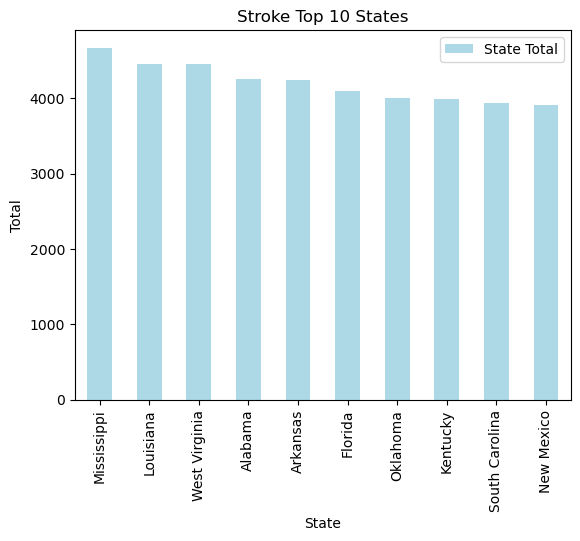

In [73]:
combined_pd_Stroke.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'])
plt.title('Stroke Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
              

In [74]:
combined_pd_Cancer = pd.merge(better_health_df1_population_by_State, Cancer,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Cancer


,State,Population,Total
0,California,39029342,2630957
1,Texas,30029572,1888815
2,Florida,22244823,2041029
3,New York,19677151,1472875
4,Pennsylvania,12972008,1138401
5,Illinois,12582032,956855
6,Ohio,11756058,1020081
7,Georgia,10912876,784263
8,North Carolina,10698973,835275
9,Michigan,10034113,869942


In [75]:
combined_pd_Cancer['Per_capita'] = (combined_pd_Cancer.Total/combined_pd_Cancer.Population) 
combined_pd_Cancer
combined_pd_Cancer.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Florida,22244823,2041029,0.091753
1,Pennsylvania,12972008,1138401,0.087758
2,Ohio,11756058,1020081,0.086771
3,Michigan,10034113,869942,0.086698
4,North Carolina,10698973,835275,0.078071
5,New Jersey,9261699,706081,0.076237
6,Illinois,12582032,956855,0.076049
7,New York,19677151,1472875,0.074852
8,Georgia,10912876,784263,0.071866
9,California,39029342,2630957,0.067410


In [76]:
combined_pd_Cancer['State Total']=round((combined_pd_Cancer.Total/combined_pd_Cancer.Population)*100000,2)
combined_pd_Cancer= combined_pd_Cancer.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Cancer.head(10)

,State,Population,Total,Per_capita,State Total
0,Florida,22244823,2041029,0.091753,9175.30
1,Pennsylvania,12972008,1138401,0.087758,8775.83
2,Ohio,11756058,1020081,0.086771,8677.07
3,Michigan,10034113,869942,0.086698,8669.84
4,North Carolina,10698973,835275,0.078071,7807.06
5,New Jersey,9261699,706081,0.076237,7623.67
6,Illinois,12582032,956855,0.076049,7604.93
7,New York,19677151,1472875,0.074852,7485.20
8,Georgia,10912876,784263,0.071866,7186.58
9,California,39029342,2630957,0.067410,6740.97


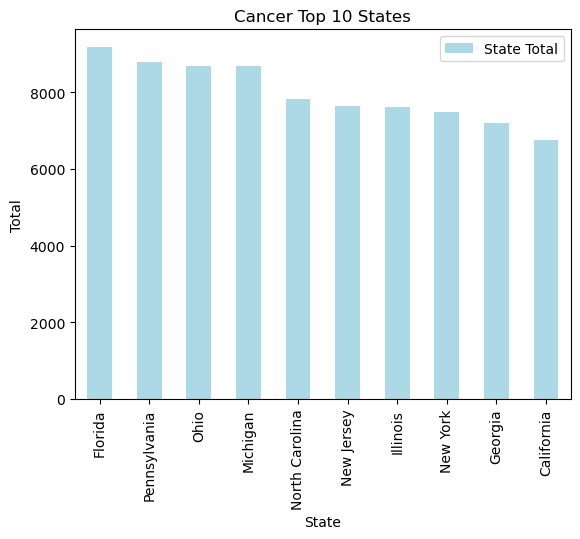

In [77]:
combined_pd_Cancer.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'])
plt.title('Cancer Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
              

In [78]:
combined_pd_Diabetes = pd.merge(better_health_df1_population_by_State, Diabetes,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Diabetes


,State,Population,Total
0,California,39029342,4484266
1,Texas,30029572,4096814
2,Florida,22244823,2964747
3,New York,19677151,2191458
4,Pennsylvania,12972008,1500161
5,Illinois,12582032,1480750
6,Ohio,11756058,1577087
7,Georgia,10912876,1374933
8,North Carolina,10698973,1280957
9,Michigan,10034113,1134922


In [79]:
combined_pd_Diabetes['Per_capita'] = (combined_pd_Diabetes.Total/combined_pd_Diabetes.Population) 
combined_pd_Diabetes
combined_pd_Diabetes.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Texas,30029572,4096814,0.136426
1,Ohio,11756058,1577087,0.134151
2,Florida,22244823,2964747,0.133278
3,Georgia,10912876,1374933,0.125992
4,North Carolina,10698973,1280957,0.119727
5,Illinois,12582032,1480750,0.117688
6,Pennsylvania,12972008,1500161,0.115646
7,California,39029342,4484266,0.114895
8,Michigan,10034113,1134922,0.113106
9,New York,19677151,2191458,0.111371


In [80]:
combined_pd_Diabetes['State Total']=round((combined_pd_Diabetes.Total/combined_pd_Diabetes.Population)*100000,2)
combined_pd_Diabetes= combined_pd_Diabetes.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Diabetes.head(10)

,State,Population,Total,Per_capita,State Total
0,Texas,30029572,4096814,0.136426,13642.60
1,Ohio,11756058,1577087,0.134151,13415.10
2,Florida,22244823,2964747,0.133278,13327.81
3,Georgia,10912876,1374933,0.125992,12599.18
4,North Carolina,10698973,1280957,0.119727,11972.71
5,Illinois,12582032,1480750,0.117688,11768.77
6,Pennsylvania,12972008,1500161,0.115646,11564.60
7,California,39029342,4484266,0.114895,11489.47
8,Michigan,10034113,1134922,0.113106,11310.64
9,New York,19677151,2191458,0.111371,11137.07


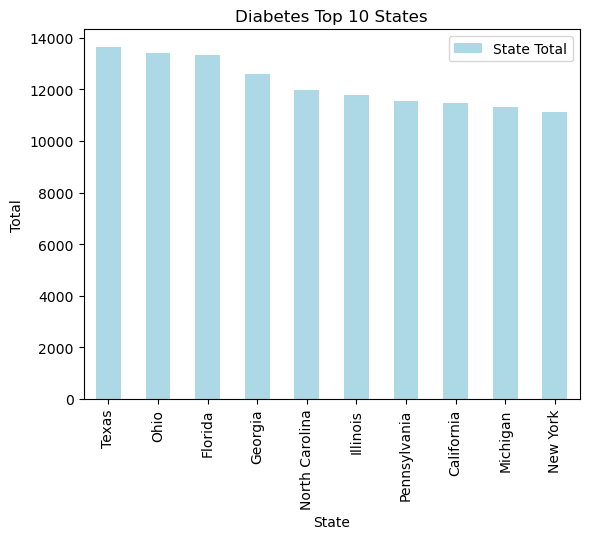

In [81]:
combined_pd_Diabetes.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'])
plt.title('Diabetes Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
              

In [82]:
combined_pd_Obesity = pd.merge(better_health_df1_population_by_State, Obesity,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Obesity

,State,Population,Total
0,California,39029342,11035112
1,Texas,30029572,10976012
2,Florida,22244823,7181692
3,New York,19677151,5898962
4,Pennsylvania,12972008,4389838
5,Illinois,12582032,4313891
6,Ohio,11756058,4587535
7,Georgia,10912876,4014053
8,North Carolina,10698973,3576877
9,Michigan,10034113,3554036


In [83]:
combined_pd_Obesity['Per_capita'] = (combined_pd_Obesity.Total/combined_pd_Obesity.Population) 
combined_pd_Obesity
combined_pd_Obesity.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Ohio,11756058,4587535,0.390227
1,Georgia,10912876,4014053,0.367827
2,Texas,30029572,10976012,0.365507
3,Michigan,10034113,3554036,0.354195
4,Illinois,12582032,4313891,0.342861
5,Pennsylvania,12972008,4389838,0.338409
6,North Carolina,10698973,3576877,0.334320
7,Florida,22244823,7181692,0.322848
8,New York,19677151,5898962,0.299787
9,California,39029342,11035112,0.282739


In [84]:
combined_pd_Obesity['State Total']=round((combined_pd_Obesity.Total/combined_pd_Obesity.Population)*100000,2)
combined_pd_Obesity= combined_pd_Obesity.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Obesity.head(10)

,State,Population,Total,Per_capita,State Total
0,Ohio,11756058,4587535,0.390227,39022.73
1,Georgia,10912876,4014053,0.367827,36782.72
2,Texas,30029572,10976012,0.365507,36550.68
3,Michigan,10034113,3554036,0.354195,35419.53
4,Illinois,12582032,4313891,0.342861,34286.12
5,Pennsylvania,12972008,4389838,0.338409,33840.85
6,North Carolina,10698973,3576877,0.334320,33431.97
7,Florida,22244823,7181692,0.322848,32284.78
8,New York,19677151,5898962,0.299787,29978.74
9,California,39029342,11035112,0.282739,28273.89


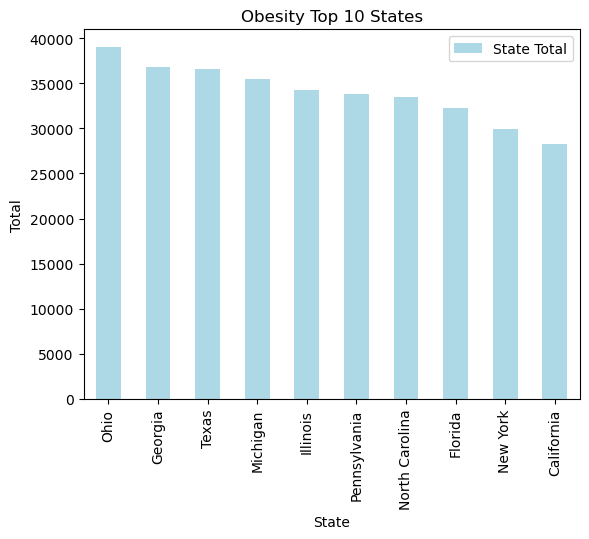

In [85]:
combined_pd_Obesity.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'])
plt.title('Obesity Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
              

In [86]:
combined_pd_Arthritis = pd.merge(better_health_df1_population_by_State, Arthritis,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Arthritis

,State,Population,Total
0,California,39029342,8522106
1,Texas,30029572,6805605
2,Florida,22244823,6293809
3,New York,19677151,4677113
4,Pennsylvania,12972008,3945048
5,Illinois,12582032,3267651
6,Ohio,11756058,3618675
7,Georgia,10912876,2885754
8,North Carolina,10698973,2858639
9,Michigan,10034113,2988790


In [87]:
combined_pd_Arthritis['Per_capita'] = (combined_pd_Arthritis.Total/combined_pd_Arthritis.Population) 
combined_pd_Arthritis
combined_pd_Arthritis.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Ohio,11756058,3618675,0.307814
1,Pennsylvania,12972008,3945048,0.304120
2,Michigan,10034113,2988790,0.297863
3,Florida,22244823,6293809,0.282934
4,North Carolina,10698973,2858639,0.267188
5,Georgia,10912876,2885754,0.264436
6,Illinois,12582032,3267651,0.259708
7,New York,19677151,4677113,0.237693
8,Texas,30029572,6805605,0.226630
9,California,39029342,8522106,0.218351


In [88]:
combined_pd_Arthritis['State Total']=round((combined_pd_Arthritis.Total/combined_pd_Arthritis.Population)*100000,2)
combined_pd_Arthritis= combined_pd_Arthritis.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Arthritis.head(10)

,State,Population,Total,Per_capita,State Total
0,Ohio,11756058,3618675,0.307814,30781.36
1,Pennsylvania,12972008,3945048,0.304120,30412.01
2,Michigan,10034113,2988790,0.297863,29786.29
3,Florida,22244823,6293809,0.282934,28293.37
4,North Carolina,10698973,2858639,0.267188,26718.82
5,Georgia,10912876,2885754,0.264436,26443.57
6,Illinois,12582032,3267651,0.259708,25970.77
7,New York,19677151,4677113,0.237693,23769.26
8,Texas,30029572,6805605,0.226630,22663.01
9,California,39029342,8522106,0.218351,21835.13


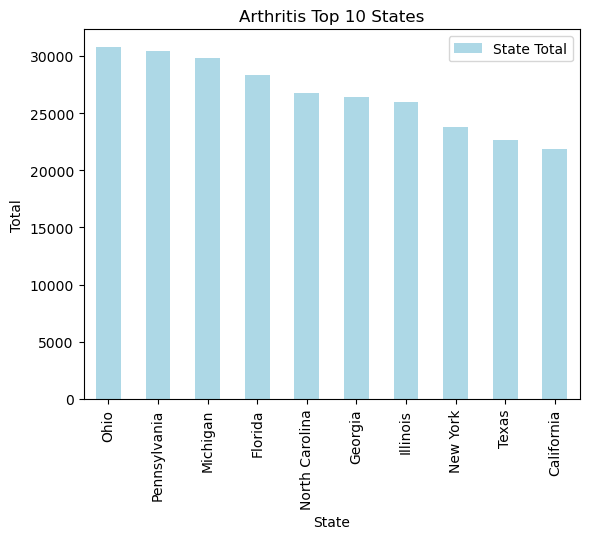

In [89]:
combined_pd_Arthritis.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'])
plt.title('Arthritis Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
              

In [90]:
combined_pd_Arthritis = pd.merge(better_health_df1_population_by_State, Arthritis,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Arthritis

,State,Population,Total
0,California,39029342,8522106
1,Texas,30029572,6805605
2,Florida,22244823,6293809
3,New York,19677151,4677113
4,Pennsylvania,12972008,3945048
5,Illinois,12582032,3267651
6,Ohio,11756058,3618675
7,Georgia,10912876,2885754
8,North Carolina,10698973,2858639
9,Michigan,10034113,2988790


In [91]:
Cognitive_Disability = better_health_df1.loc[better_health_df1['Category'] == 'Cognitive Disability'].reset_index(drop=True).round()
Cognitive_Disability.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,19.0,Cognitive Disability,Alabama,2022,AL,Lowndes,Disability,9777,POINT (-86.65006 32.15503),1886
1,22.0,Cognitive Disability,Arkansas,2022,AR,Lee,Disability,8364,POINT (-90.78057 34.78067),1806
2,15.0,Cognitive Disability,California,2022,CA,Lake,Disability,68191,POINT (-122.75341 39.09999),10092
3,14.0,Cognitive Disability,Arizona,2022,AZ,Yavapai,Disability,246191,POINT (-112.55364 34.59970),35697
4,18.0,Cognitive Disability,Alabama,2022,AL,Butler,Disability,18650,POINT (-86.68045 31.75260),3357


In [92]:
Cognitive_Disability=Cognitive_Disability[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Cognitive_Disability.head(10)


,State,Total
1,California,5415066
2,Texas,4710013
3,Florida,3261678
4,New York,2318039
5,Ohio,1830421
6,Pennsylvania,1828713
7,Illinois,1571690
8,Georgia,1539991
9,North Carolina,1522061
10,Michigan,1377023


In [93]:
combined_pd_Cognitive_Disability= pd.merge(better_health_df1_population_by_State, Cognitive_Disability,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Cognitive_Disability.head(10)

,State,Population,Total
0,California,39029342,5415066
1,Texas,30029572,4710013
2,Florida,22244823,3261678
3,New York,19677151,2318039
4,Pennsylvania,12972008,1828713
5,Illinois,12582032,1571690
6,Ohio,11756058,1830421
7,Georgia,10912876,1539991
8,North Carolina,10698973,1522061
9,Michigan,10034113,1377023


In [94]:
combined_pd_Cognitive_Disability['Per_capita'] = (combined_pd_Cognitive_Disability.Total/combined_pd_Cognitive_Disability.Population) 
combined_pd_Cognitive_Disability
combined_pd_Cognitive_Disability.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,West Virginia,1775156,327264,0.184358
1,Louisiana,4590241,845470,0.184189
2,Oklahoma,4019800,736159,0.183133
3,Arkansas,3045637,534810,0.175599
4,Kentucky,4512310,779244,0.172693
5,Mississippi,2940057,499111,0.169762
6,Tennessee,7051339,1188431,0.168540
7,Alabama,5074296,822568,0.162105
8,New Mexico,2113344,336566,0.159258
9,Missouri,6177957,979681,0.158577


In [95]:
combined_pd_Cognitive_Disability['State Total']=round((combined_pd_Cognitive_Disability.Total/combined_pd_Cognitive_Disability.Population)*100000,2)
combined_pd_Cognitive_Disability= combined_pd_Cognitive_Disability.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Cognitive_Disability.head(10)

,State,Population,Total,Per_capita,State Total
0,West Virginia,1775156,327264,0.184358,18435.79
1,Louisiana,4590241,845470,0.184189,18418.86
2,Oklahoma,4019800,736159,0.183133,18313.32
3,Arkansas,3045637,534810,0.175599,17559.87
4,Kentucky,4512310,779244,0.172693,17269.29
5,Mississippi,2940057,499111,0.169762,16976.24
6,Tennessee,7051339,1188431,0.168540,16853.98
7,Alabama,5074296,822568,0.162105,16210.49
8,New Mexico,2113344,336566,0.159258,15925.76
9,Missouri,6177957,979681,0.158577,15857.69


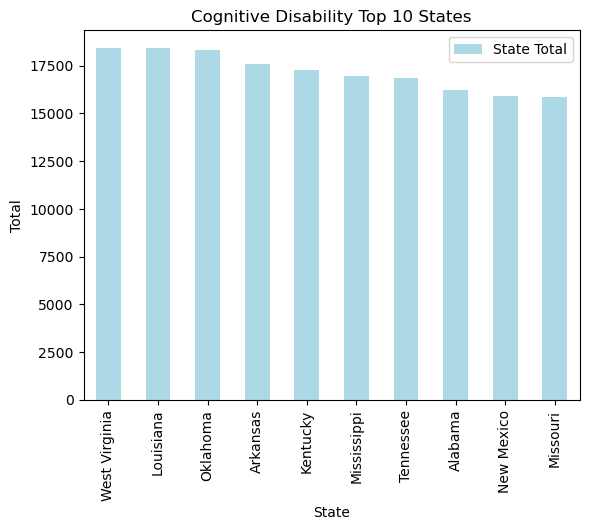

In [96]:
combined_pd_Cognitive_Disability.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'])
plt.title('Cognitive Disability Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
            

In [97]:
combined_pd_Depression= pd.merge(better_health_df1_population_by_State, Depression,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Depression.head(10)

,State,Population,Total
0,California,39029342,8030499
1,Texas,30029572,6545857
2,Florida,22244823,4314403
3,New York,19677151,3682820
4,Pennsylvania,12972008,2985296
5,Illinois,12582032,2384346
6,Ohio,11756058,2985520
7,Georgia,10912876,2223313
8,North Carolina,10698973,2409927
9,Michigan,10034113,2408741


In [98]:
combined_pd_Depression['Per_capita'] = (combined_pd_Depression.Total/combined_pd_Depression.Population) 
combined_pd_Depression
combined_pd_Depression.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,Ohio,11756058,2985520,0.253956
1,Michigan,10034113,2408741,0.240055
2,Pennsylvania,12972008,2985296,0.230134
3,North Carolina,10698973,2409927,0.225248
4,Texas,30029572,6545857,0.217980
5,California,39029342,8030499,0.205755
6,Georgia,10912876,2223313,0.203733
7,Florida,22244823,4314403,0.193951
8,Illinois,12582032,2384346,0.189504
9,New York,19677151,3682820,0.187162


In [99]:
combined_pd_Depression['State Total']=round((combined_pd_Depression.Total/combined_pd_Depression.Population)*100000,2)
combined_pd_Depression= combined_pd_Depression.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Depression.head(10)

,State,Population,Total,Per_capita,State Total
0,Ohio,11756058,2985520,0.253956,25395.59
1,Michigan,10034113,2408741,0.240055,24005.52
2,Pennsylvania,12972008,2985296,0.230134,23013.37
3,North Carolina,10698973,2409927,0.225248,22524.84
4,Texas,30029572,6545857,0.217980,21798.04
5,California,39029342,8030499,0.205755,20575.54
6,Georgia,10912876,2223313,0.203733,20373.30
7,Florida,22244823,4314403,0.193951,19395.09
8,Illinois,12582032,2384346,0.189504,18950.40
9,New York,19677151,3682820,0.187162,18716.23


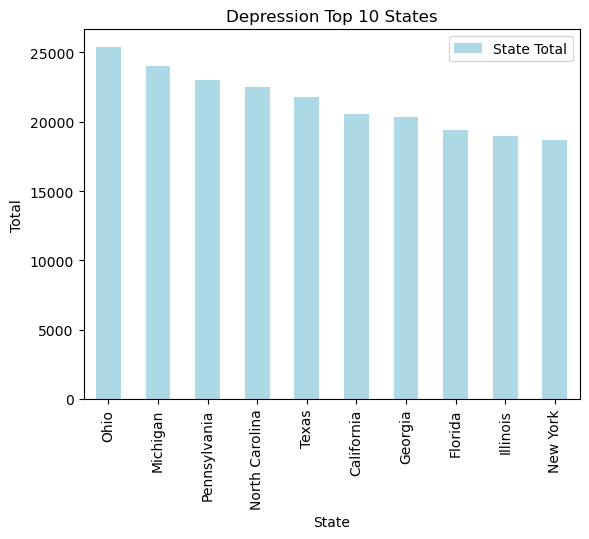

In [100]:
combined_pd_Depression.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'])
plt.title('Depression Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')

In [101]:
High_Blood_Pressure = better_health_df1.loc[better_health_df1['Category'] == 'High Blood Pressure'].reset_index(drop=True).round()
High_Blood_Pressure.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,35.0,High Blood Pressure,Alaska,2021,AK,Yakutat,Health Outcomes,700,POINT (-140.35766 59.88901),246
1,45.0,High Blood Pressure,Arkansas,2021,AR,Newton,Health Outcomes,7078,POINT (-93.21756 35.92010),3185
2,41.0,High Blood Pressure,Arkansas,2021,AR,White,Health Outcomes,77755,POINT (-91.74548 35.25609),32035
3,32.0,High Blood Pressure,California,2021,CA,Shasta,Health Outcomes,180930,POINT (-122.04025 40.76379),58078
4,47.0,High Blood Pressure,Arkansas,2021,AR,Marion,Health Outcomes,17254,POINT (-92.68451 36.26865),8057


In [102]:
High_Blood_Pressure=High_Blood_Pressure[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
High_Blood_Pressure.head(10)

,State,Total
1,California,11081550
2,Texas,9806826
3,New York,6157261
4,Pennsylvania,4258462
5,Ohio,4239388
6,Georgia,4085867
7,Illinois,4003674
8,North Carolina,3739814
9,Michigan,3534853
10,Virginia,2956192


In [103]:
combined_pd_High_Blood_Pressure= pd.merge(better_health_df1_population_by_State, High_Blood_Pressure,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_High_Blood_Pressure.head(10)

,State,Population,Total
0,California,39029342,11081550
1,Texas,30029572,9806826
2,New York,19677151,6157261
3,Pennsylvania,12972008,4258462
4,Illinois,12582032,4003674
5,Ohio,11756058,4239388
6,Georgia,10912876,4085867
7,North Carolina,10698973,3739814
8,Michigan,10034113,3534853
9,New Jersey,9261699,2867614


In [104]:
combined_pd_High_Blood_Pressure['Per_capita'] = (combined_pd_High_Blood_Pressure.Total/combined_pd_High_Blood_Pressure.Population) 
combined_pd_High_Blood_Pressure
combined_pd_High_Blood_Pressure.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,Mississippi,2940057,1296873,0.441105
1,West Virginia,1775156,754477,0.425020
2,Alabama,5074296,2084103,0.410718
3,Louisiana,4590241,1829945,0.398660
4,Arkansas,3045637,1212220,0.398019
5,Kentucky,4512310,1751335,0.388124
6,South Carolina,5282634,1994969,0.377647
7,Tennessee,7051339,2653650,0.376333
8,Oklahoma,4019800,1512178,0.376182
9,Georgia,10912876,4085867,0.374408


In [105]:
combined_pd_High_Blood_Pressure['State Total']=round((combined_pd_High_Blood_Pressure.Total/combined_pd_High_Blood_Pressure.Population)*100000,2)
combined_pd_High_Blood_Pressure= combined_pd_High_Blood_Pressure.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_High_Blood_Pressure.head(10)

,State,Population,Total,Per_capita,State Total
0,Mississippi,2940057,1296873,0.441105,44110.47
1,West Virginia,1775156,754477,0.425020,42502.01
2,Alabama,5074296,2084103,0.410718,41071.77
3,Louisiana,4590241,1829945,0.398660,39865.99
4,Arkansas,3045637,1212220,0.398019,39801.85
5,Kentucky,4512310,1751335,0.388124,38812.38
6,South Carolina,5282634,1994969,0.377647,37764.66
7,Tennessee,7051339,2653650,0.376333,37633.28
8,Oklahoma,4019800,1512178,0.376182,37618.24
9,Georgia,10912876,4085867,0.374408,37440.79


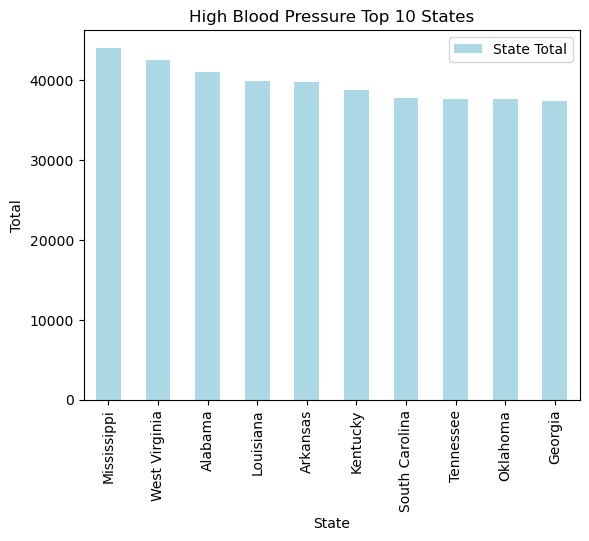

In [106]:
combined_pd_High_Blood_Pressure.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'])
plt.title('High Blood Pressure Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
            

In [107]:
#better_health_df1_percentage.groupby('State')['Population'].sum().to_frame().sort_values(by='State', ascending = False).reset_index().drop(0)


Some of the 3 factors: Cigarette smoking,Physical inactivity,Excessive alcohol use


In [108]:
Current_Cigarette_Smoking = better_health_df1.loc[better_health_df1['Category'] == 'Current Cigarette Smoking'].reset_index(drop=True).round()
Current_Cigarette_Smoking.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,25.0,Current Cigarette Smoking,Arkansas,2022,AR,Fulton,Health Risk Behaviors,12382,POINT (-91.81789 36.38162),3107
1,19.0,Current Cigarette Smoking,Arkansas,2022,AR,Sebastian,Health Risk Behaviors,129059,POINT (-94.27471 35.19945),24392
2,21.0,Current Cigarette Smoking,Arkansas,2022,AR,Yell,Health Risk Behaviors,20129,POINT (-93.41031 35.00278),4227
3,15.0,Current Cigarette Smoking,Arizona,2022,AZ,Graham,Health Risk Behaviors,38779,POINT (-109.88740 32.93276),5894
4,24.0,Current Cigarette Smoking,Arkansas,2022,AR,Phillips,Health Risk Behaviors,15304,POINT (-90.84869 34.42766),3611


In [109]:
Current_Cigarette_Smoking=Current_Cigarette_Smoking[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Current_Cigarette_Smoking.head(10)

,State,Total
1,California,4396283
2,Texas,4361569
3,Florida,3035472
4,New York,2403890
5,Ohio,2104681
6,Pennsylvania,2043617
7,Illinois,1671777
8,Michigan,1610464
9,Georgia,1581503
10,North Carolina,1525349


In [110]:
combined_pd_Current_Cigarette_Smoking= pd.merge(better_health_df1_population_by_State, Current_Cigarette_Smoking,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Current_Cigarette_Smoking.head(10)

,State,Population,Total
0,California,39029342,4396283
1,Texas,30029572,4361569
2,Florida,22244823,3035472
3,New York,19677151,2403890
4,Pennsylvania,12972008,2043617
5,Illinois,12582032,1671777
6,Ohio,11756058,2104681
7,Georgia,10912876,1581503
8,North Carolina,10698973,1525349
9,Michigan,10034113,1610464


In [111]:
combined_pd_Current_Cigarette_Smoking['Per_capita'] = (combined_pd_Current_Cigarette_Smoking.Total/combined_pd_Current_Cigarette_Smoking.Population) 
combined_pd_Current_Cigarette_Smoking
combined_pd_Current_Cigarette_Smoking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,West Virginia,1775156,358028,0.201688
1,Tennessee,7051339,1344392,0.190658
2,Louisiana,4590241,858173,0.186956
3,Arkansas,3045637,563348,0.184969
4,Kentucky,4512310,833982,0.184824
5,Mississippi,2940057,535001,0.181970
6,Missouri,6177957,1108470,0.179423
7,Ohio,11756058,2104681,0.179029
8,Indiana,6833037,1192115,0.174463
9,Oklahoma,4019800,684864,0.170373


In [112]:
combined_pd_Current_Cigarette_Smoking['State Total']=round((combined_pd_Current_Cigarette_Smoking.Total/combined_pd_Current_Cigarette_Smoking.Population)*100000,2)
combined_pd_Current_Cigarette_Smoking= combined_pd_Current_Cigarette_Smoking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Current_Cigarette_Smoking.head(10)

,State,Population,Total,Per_capita,State Total
0,West Virginia,1775156,358028,0.201688,20168.82
1,Tennessee,7051339,1344392,0.190658,19065.77
2,Louisiana,4590241,858173,0.186956,18695.60
3,Arkansas,3045637,563348,0.184969,18496.89
4,Kentucky,4512310,833982,0.184824,18482.37
5,Mississippi,2940057,535001,0.181970,18196.96
6,Missouri,6177957,1108470,0.179423,17942.34
7,Ohio,11756058,2104681,0.179029,17902.95
8,Indiana,6833037,1192115,0.174463,17446.34
9,Oklahoma,4019800,684864,0.170373,17037.27


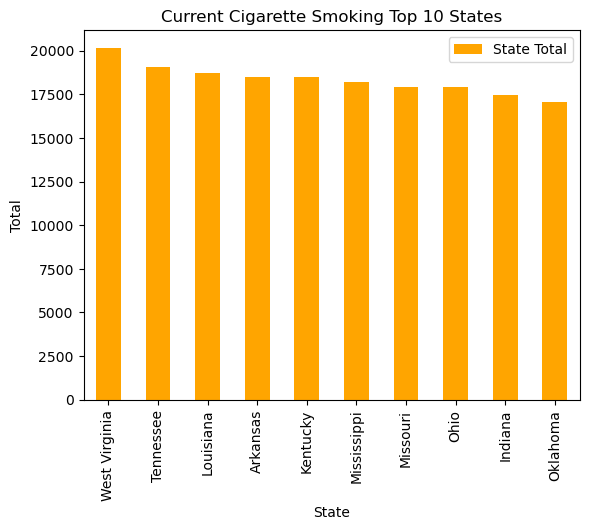

In [113]:
combined_pd_Current_Cigarette_Smoking.head(10).plot.bar(x= 'State', y='State Total', color=['orange'])
plt.title('Current Cigarette Smoking Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
            

In [114]:
Physical_Inactivity = better_health_df1.loc[better_health_df1['Category'] == 'Physical Inactivity'].reset_index(drop=True).round()
Physical_Inactivity.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,25.0,Physical Inactivity,Alabama,2022,AL,Baldwin,Health Risk Behaviors,246435,POINT (-87.72262 30.72775),62594
1,31.0,Physical Inactivity,Arizona,2022,AZ,Mohave,Health Risk Behaviors,220816,POINT (-113.75810 35.70447),68673
2,23.0,Physical Inactivity,California,2022,CA,Mendocino,Health Risk Behaviors,89783,POINT (-123.39132 39.44031),20290
3,21.0,Physical Inactivity,Alaska,2022,AK,Chugach,Health Risk Behaviors,6874,POINT (-145.84667 60.71481),1436
4,28.0,Physical Inactivity,California,2022,CA,Del Norte,Health Risk Behaviors,27082,POINT (-123.89712 41.74316),7582


In [115]:
Physical_Inactivity=Physical_Inactivity[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Physical_Inactivity.head(10)


,State,Total
1,California,8737681
2,Texas,8252496
3,Florida,5859877
4,New York,4935574
5,Pennsylvania,3087743
6,Ohio,3082723
7,Illinois,2802576
8,Georgia,2776015
9,North Carolina,2426213
10,Michigan,2395455


In [116]:
combined_pd_Physical_Inactivity= pd.merge(better_health_df1_population_by_State, Physical_Inactivity,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Physical_Inactivity.head(10)

,State,Population,Total
0,California,39029342,8737681
1,Texas,30029572,8252496
2,Florida,22244823,5859877
3,New York,19677151,4935574
4,Pennsylvania,12972008,3087743
5,Illinois,12582032,2802576
6,Ohio,11756058,3082723
7,Georgia,10912876,2776015
8,North Carolina,10698973,2426213
9,Michigan,10034113,2395455


In [117]:
combined_pd_Physical_Inactivity['Per_capita'] = (combined_pd_Physical_Inactivity.Total/combined_pd_Physical_Inactivity.Population) 
combined_pd_Physical_Inactivity
combined_pd_Physical_Inactivity.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,Mississippi,2940057,950029,0.323133
1,West Virginia,1775156,559052,0.314931
2,Arkansas,3045637,944234,0.310028
3,Oklahoma,4019800,1208608,0.300664
4,Louisiana,4590241,1379573,0.300545
5,Alabama,5074296,1452707,0.286287
6,Tennessee,7051339,1985345,0.281556
7,Indiana,6833037,1904215,0.278678
8,Texas,30029572,8252496,0.274812
9,Kentucky,4512310,1212051,0.268610


In [118]:
combined_pd_Physical_Inactivity['State Total']=round((combined_pd_Physical_Inactivity.Total/combined_pd_Physical_Inactivity.Population)*100000,2)
combined_pd_Physical_Inactivity= combined_pd_Physical_Inactivity.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Physical_Inactivity.head(10)

,State,Population,Total,Per_capita,State Total
0,Mississippi,2940057,950029,0.323133,32313.29
1,West Virginia,1775156,559052,0.314931,31493.12
2,Arkansas,3045637,944234,0.310028,31002.84
3,Oklahoma,4019800,1208608,0.300664,30066.37
4,Louisiana,4590241,1379573,0.300545,30054.48
5,Alabama,5074296,1452707,0.286287,28628.74
6,Tennessee,7051339,1985345,0.281556,28155.57
7,Indiana,6833037,1904215,0.278678,27867.77
8,Texas,30029572,8252496,0.274812,27481.23
9,Kentucky,4512310,1212051,0.268610,26860.99


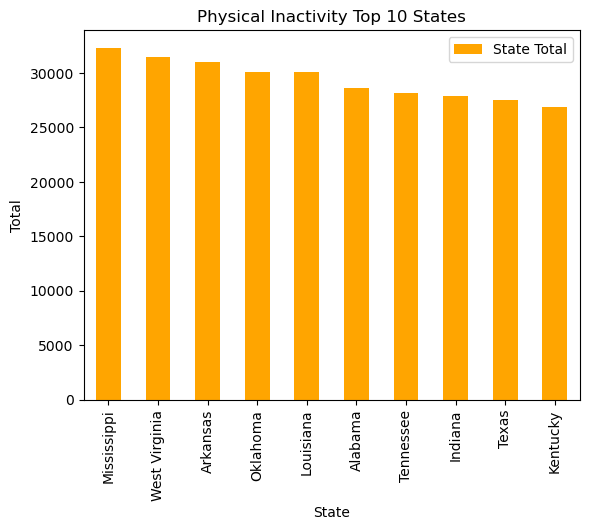

In [119]:
combined_pd_Physical_Inactivity.head(10).plot.bar(x= 'State', y='State Total', color=['orange'])
plt.title('Physical Inactivity Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')

Binge Drinking

In [120]:
Binge_Drinking1 = better_health_df1.loc[better_health_df1['Category'] == 'Binge Drinking'].reset_index(drop=True).round()
Binge_Drinking1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,16.0,Binge Drinking,California,2022,CA,Sierra,Health Risk Behaviors,3217,POINT (-120.51647 39.58029),514
1,20.0,Binge Drinking,Alaska,2022,AK,Anchorage,Health Risk Behaviors,287145,POINT (-149.11255 61.15048),55993
2,19.0,Binge Drinking,California,2022,CA,Shasta,Health Risk Behaviors,180930,POINT (-122.04025 40.76379),33652
3,16.0,Binge Drinking,Alabama,2022,AL,Cullman,Health Risk Behaviors,90665,POINT (-86.86746 34.13212),14234
4,19.0,Binge Drinking,Idaho,2022,ID,Latah,Health Risk Behaviors,40978,POINT (-116.71170 46.81557),7826


In [121]:
Binge_Drinking=Binge_Drinking1[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Binge_Drinking.head(10)


,State,Total
1,California,7072872
2,Texas,5303525
3,Florida,3585439
4,New York,3480270
5,Illinois,2409678
6,Pennsylvania,2372538
7,Ohio,2124873
8,North Carolina,1821770
9,Michigan,1769505
10,Georgia,1664358


In [122]:
combined_pd_Binge_Drinking= pd.merge(better_health_df1_population_by_State, Binge_Drinking,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Binge_Drinking.head(10)


,State,Population,Total
0,California,39029342,7072872
1,Texas,30029572,5303525
2,Florida,22244823,3585439
3,New York,19677151,3480270
4,Pennsylvania,12972008,2372538
5,Illinois,12582032,2409678
6,Ohio,11756058,2124873
7,Georgia,10912876,1664358
8,North Carolina,10698973,1821770
9,Michigan,10034113,1769505


In [123]:
combined_pd_Binge_Drinking['Per_capita'] = (combined_pd_Binge_Drinking.Total/combined_pd_Binge_Drinking.Population) 
combined_pd_Binge_Drinking
combined_pd_Binge_Drinking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,District of Columbia,671803,165263,0.245999
1,North Dakota,779261,171861,0.220544
2,Iowa,3200517,695006,0.217154
3,Montana,1122867,242670,0.216116
4,Wisconsin,5892539,1258363,0.213552
5,Minnesota,5717184,1167886,0.204276
6,Colorado,5839926,1165779,0.199622
7,South Dakota,909824,181283,0.199251
8,Alaska,733583,141519,0.192915
9,Nebraska,1967923,379245,0.192713


In [124]:
combined_pd_Binge_Drinking['State Total']=round((combined_pd_Binge_Drinking.Total/combined_pd_Binge_Drinking.Population)*100000,2)
combined_pd_Binge_Drinking= combined_pd_Binge_Drinking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Binge_Drinking.head(10)

,State,Population,Total,Per_capita,State Total
0,District of Columbia,671803,165263,0.245999,24599.92
1,North Dakota,779261,171861,0.220544,22054.36
2,Iowa,3200517,695006,0.217154,21715.43
3,Montana,1122867,242670,0.216116,21611.64
4,Wisconsin,5892539,1258363,0.213552,21355.19
5,Minnesota,5717184,1167886,0.204276,20427.64
6,Colorado,5839926,1165779,0.199622,19962.22
7,South Dakota,909824,181283,0.199251,19925.06
8,Alaska,733583,141519,0.192915,19291.48
9,Nebraska,1967923,379245,0.192713,19271.33


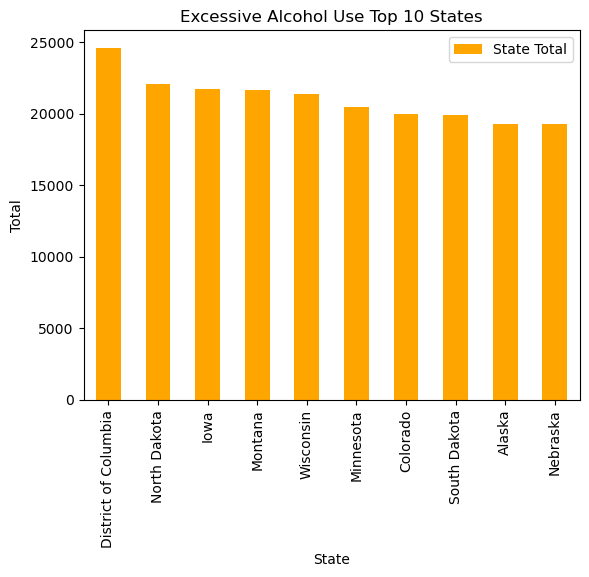

In [125]:
combined_pd_Binge_Drinking.head(10).plot.bar(x= 'State', y='State Total', color=['orange'])
plt.title('Excessive Alcohol Use Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')

In [126]:
#Want to create HEATMAP:))))) 

better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982),2371
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986),29015


In [127]:
BH=better_health_df1.drop(0).reset_index(drop = True)
BH_drinking = BH.loc[BH['Category']=='Binge Drinking'].reset_index(drop=True).round()
BH_drinking=BH_drinking[['State', 'Total', 'Geometry']]
BH_drinking

,State,Total,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)
...,...,...,...
3140,Wisconsin,2745,POINT (-91.75438 44.37979)
3141,Wisconsin,4154,POINT (-90.50146 45.21145)
3142,Wisconsin,25807,POINT (-87.94533 43.72125)
3143,Wyoming,1211,POINT (-107.68261 43.90446)


In [128]:
type(BH_drinking)

geopandas.geodataframe.GeoDataFrame

In [129]:
BH_drinking

,State,Total,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)
...,...,...,...
3140,Wisconsin,2745,POINT (-91.75438 44.37979)
3141,Wisconsin,4154,POINT (-90.50146 45.21145)
3142,Wisconsin,25807,POINT (-87.94533 43.72125)
3143,Wyoming,1211,POINT (-107.68261 43.90446)


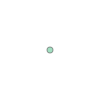

In [130]:
BH_drinking.loc[0, 'Geometry']

In [131]:
print(BH_drinking.loc[0, 'Geometry'])

POINT (-120.516466065629 39.5802928882158)


In [132]:
#BH_drinking.plot();

In [133]:
BH_drinking.columns

Index(['State', 'Total', 'Geometry'], dtype='object')

In [134]:
#chicago.plot(column="POP2010");
#BH_drinking.plot(columns=(['State', 'Total', 'Geometry'])

In [135]:
Binge_Drinking1Test=Binge_Drinking1.groupby('State')['Total'].sum().to_frame().reset_index().drop(44).reset_index(drop=True)
Binge_Drinking1Test=Binge_Drinking1Test.drop(44).reset_index(drop=True)
Binge_Drinking1Test

,State,Total
0,Alabama,731707
1,Alaska,141519
2,Arizona,1260144
3,Arkansas,491750
4,California,7072872
5,Colorado,1165779
6,Connecticut,608400
7,Delaware,152835
8,District of Columbia,165263
9,Florida,3585439


In [136]:
type(Binge_Drinking1Test)

pandas.core.frame.DataFrame

In [137]:
#Trash_missed_by_Zip_Code.to_csv('../data/Trash_missed_by_Zip_Code.csv')
Binge_Drinking1Test.to_csv('../data/Binge_Drinking1Test.csv')

In [138]:
#Trash_by_Zip_Codes = pd.read_csv('../data/Trash_missed_by_Zip_Code.csv')
##print(Trash_by.crs)
#Trash_by_Zip_Codes.head( )
Binge_Drinking1Test= pd.read_csv('../data/Binge_Drinking1Test.csv')
Binge_Drinking1Test

,Unnamed: 0,State,Total
0,0,Alabama,731707
1,1,Alaska,141519
2,2,Arizona,1260144
3,3,Arkansas,491750
4,4,California,7072872
5,5,Colorado,1165779
6,6,Connecticut,608400
7,7,Delaware,152835
8,8,District of Columbia,165263
9,9,Florida,3585439


In [139]:
#BH_drinking.to_csv('../data/BH_drinking.geojson')

In [140]:
#zipcodes = gpd.read_file('../data/zipcodes.geojson')
#print(zipcodes.crs)
#zipcodes.head( )
#BH_drinking= gpd.read_file('../data/BH_drinking.geojson')
#BH_drinking

In [141]:
BH_drinking=BH_drinking[['State','Total','Geometry']]
BH_drinking

,State,Total,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)
...,...,...,...
3140,Wisconsin,2745,POINT (-91.75438 44.37979)
3141,Wisconsin,4154,POINT (-90.50146 45.21145)
3142,Wisconsin,25807,POINT (-87.94533 43.72125)
3143,Wyoming,1211,POINT (-107.68261 43.90446)


In [142]:
type(BH_drinking)

geopandas.geodataframe.GeoDataFrame

In [143]:
firsttry= pd.merge(left = BH_drinking, right = Binge_Drinking, 
                   left_on = 'State', right_on = 'State')
firsttry=firsttry[['State','Total_x', 'Geometry']]
firsttry

,State,Total_x,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)
...,...,...,...
3139,Wisconsin,2745,POINT (-91.75438 44.37979)
3140,Wisconsin,4154,POINT (-90.50146 45.21145)
3141,Wisconsin,25807,POINT (-87.94533 43.72125)
3142,Wyoming,1211,POINT (-107.68261 43.90446)


In [144]:
type(firsttry)

geopandas.geodataframe.GeoDataFrame

In [145]:
#firsttry.plot()
area_center=print(firsttry.loc[0,'Geometry'])

#area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

POINT (-120.516466065629 39.5802928882158)
None


In [146]:
#map_37207 = folium.Map(location =  area_center, zoom_start = 12)
#map_37207

In [147]:
#map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_firsttry=folium.Map(location = area_center, zoom_start = 12)
map_firsttry

In [148]:
firsttry.State.value_counts()
first

NameError: name 'first' is not defined

In [ ]:
i = 0
for row_index, row_values in firsttry.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

In [ ]:
#map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_firsttry=folium.Map(location = area_center, zoom_start = 12)
#folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

#for row_index, row_values in stops_in_37207.iterrows():
    #loc = [row_values['lat'], row_values['lng']]
    #pop = str(row_values['route'])
    #icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    #marker = folium.Marker(
        #location = loc, 
        #popup = pop, icon = icon) 

    #marker.add_to(map_37207)
#map_37207.save('../maps/map37207.html')

#display our map
#map_37207

In [ ]:
better_health_df1

In [ ]:
type(better_health_df1)


In [ ]:
better_health_df1

better_health_df2=better_health_df1.loc[1,'Geometry']
better_health_df2

In [ ]:
type(better_health_df2)

In [ ]:

try1=pd.merge(left = BH_drinking, right = better_health_df1, 
                   left_on = 'State', right_on = 'State')
try1=firsttry[['State','Total_x', 'Geometry']]
try1


In [ ]:
type(try1)

In [ ]:
#try1.plot();

Q2: - Looking at Excel Spredsheet for NHE

In [ ]:

nhe_df = pd.read_csv('../data/Table_1_NHE.csv')
nhe_df.head()

In [ ]:
nhe_df.columns

In [ ]:
type(nhe_df)

In [ ]:
nhe_df.reset_index

In [ ]:
nhe_df.columns

In [ ]:
   
nhe_df1 = nhe_df.drop(columns=['Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
                              'Unnamed: 36','Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42','Unnamed: 43',
                              'Unnamed: 44','Unnamed: 45', 'Unnamed: 46','Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
                              'Unnamed: 52','Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
                              'Unnamed: 60'])

nhe_df1.head()
    

In [ ]:

nhe_df1=nhe_df1.rename(columns ={'Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022': 'NHE',
       'Unnamed: 1': '1960', 'Unnamed: 2': '1970', 'Unnamed: 3': '1980','Unnamed: 4': '1990', 'Unnamed: 5':'2000',
       'Unnamed: 6':'2001', 'Unnamed: 7':'2002', 'Unnamed: 8':'2003', 'Unnamed: 9':'2004', 'Unnamed: 10':'2005',
       'Unnamed: 11':'2006', 'Unnamed: 12':'2007', 'Unnamed: 13':'2008', 'Unnamed: 14':'2009',
       'Unnamed: 15':'2010', 'Unnamed: 16':'2011', 'Unnamed: 17': '2012', 'Unnamed: 18':'2013',
       'Unnamed: 19':'2014', 'Unnamed: 20':'2015', 'Unnamed: 21':'2016', 'Unnamed: 22':'2017',
       'Unnamed: 23':'2018', 'Unnamed: 24':'2019', 'Unnamed: 25':'2020', 'Unnamed: 26':'2021',
       'Unnamed: 27':'2022'})
nhe_df1.head()


In [ ]:
nhe_df1 = nhe_df1.dropna()
nhe_df1.head()

In [ ]:
#df = df.drop([0, 2])
#df.drop(1, inplace=True)
#df.dropna()
#df.drop(1)  # for 1 row

In [ ]:
nhe_df1=nhe_df1.drop(0)
nhe_df1.head()

In [ ]:
nhe_df1.info()

In [ ]:
##candy_df['Name']=candy_df['Name'].astype(str)
##candy_df.head()
nhe_df1 = nhe_df1.astype(str)
nhe_df1.head()


In [ ]:
nhe_df1.shape

In [ ]:
type(nhe_df1)

In [ ]:
nhe_df1.head()

In [ ]:
##pd.set_option('display.max.columns',30)
#df
pd.set_option('display.max.columns', 28)
pd.set_option('display.max.rows', 22)


In [ ]:
nhe_df1.head()

In [ ]:
##df.reset_index(drop=True, inplace=True)

nhe_df1 = nhe_df1.reset_index(drop=True)
nhe_df1.head()

In [ ]:
#Get rid off min. in duration column and change into integer
##movies_df['duration']=movies_df.duration.str[:-4].astype(int)

nhe_df1['1960']= nhe_df1['1960'].str.replace('$', '')
nhe_df1['1960']= nhe_df1['1960'].str.replace('%', '')
#nhe_df1['1960'] = nhe_df1['1960'].astype(str)


In [ ]:
nhe_df1['1970']= nhe_df1['1970'].str.replace('$', '')
nhe_df1['1970']= nhe_df1['1970'].str.replace('%', '')
##nhe_df1['1970'] = nhe_df1['1970'].astype(int)

In [ ]:
nhe_df1['1980']= nhe_df1['1980'].str.replace('$', '')
nhe_df1['1980']= nhe_df1['1980'].str.replace('%', '')

In [ ]:
nhe_df1['1990']= nhe_df1['1990'].str.replace('$', '')
nhe_df1['1990']= nhe_df1['1990'].str.replace('%', '')

In [ ]:
nhe_df1['2000']= nhe_df1['2000'].str.replace('$', '')
nhe_df1['2000']= nhe_df1['2000'].str.replace('%', '')

In [ ]:
nhe_df1['2001']= nhe_df1['2001'].str.replace('$', '')
nhe_df1['2001']= nhe_df1['2001'].str.replace('%', '')

In [ ]:
nhe_df1['2002']= nhe_df1['2002'].str.replace('$', '')
nhe_df1['2002']= nhe_df1['2002'].str.replace('%', '')

In [ ]:
nhe_df1['2003']= nhe_df1['2003'].str.replace('$', '')
nhe_df1['2003']= nhe_df1['2003'].str.replace('%', '')

In [ ]:
nhe_df1['2004']= nhe_df1['2004'].str.replace('$', '')
nhe_df1['2004']= nhe_df1['2004'].str.replace('%', '')

In [ ]:
nhe_df1['2005']= nhe_df1['2005'].str.replace('$', '')
nhe_df1['2005']= nhe_df1['2005'].str.replace('%', '')

In [ ]:
nhe_df1['2006']= nhe_df1['2006'].str.replace('$', '')
nhe_df1['2006']= nhe_df1['2006'].str.replace('%', '')

In [ ]:
nhe_df1['2007']= nhe_df1['2007'].str.replace('$', '')
nhe_df1['2007']= nhe_df1['2007'].str.replace('%', '')

In [ ]:
nhe_df1['2008']= nhe_df1['2008'].str.replace('$', '')
nhe_df1['2008']= nhe_df1['2008'].str.replace('%', '')

In [ ]:
nhe_df1['2009']= nhe_df1['2009'].str.replace('$', '')
nhe_df1['2009']= nhe_df1['2009'].str.replace('%', '')

In [ ]:
nhe_df1['2010']= nhe_df1['2010'].str.replace('$', '')
nhe_df1['2010']= nhe_df1['2010'].str.replace('%', '')

In [ ]:
nhe_df1['2011']= nhe_df1['2011'].str.replace('$', '')
nhe_df1['2011']= nhe_df1['2011'].str.replace('%', '')

In [ ]:
nhe_df1['2012']= nhe_df1['2012'].str.replace('$', '')
nhe_df1['2012']= nhe_df1['2012'].str.replace('%', '')

In [ ]:
nhe_df1['2013']= nhe_df1['2013'].str.replace('$', '')
nhe_df1['2013']= nhe_df1['2013'].str.replace('%', '')

In [ ]:
nhe_df1['2014']= nhe_df1['2014'].str.replace('$', '')
nhe_df1['2014']= nhe_df1['2014'].str.replace('%', '')

In [ ]:
nhe_df1['2015']= nhe_df1['2015'].str.replace('$', '')
nhe_df1['2015']= nhe_df1['2015'].str.replace('%', '')

In [ ]:
nhe_df1['2016']= nhe_df1['2016'].str.replace('$', '')
nhe_df1['2016']= nhe_df1['2016'].str.replace('%', '')

In [ ]:
nhe_df1['2017']= nhe_df1['2017'].str.replace('$', '')
nhe_df1['2017']= nhe_df1['2017'].str.replace('%', '')

In [ ]:
nhe_df1['2018']= nhe_df1['2018'].str.replace('$', '')
nhe_df1['2018']= nhe_df1['2018'].str.replace('%', '')

In [ ]:
nhe_df1['2019']= nhe_df1['2019'].str.replace('$', '')
nhe_df1['2019']= nhe_df1['2019'].str.replace('%', '')

In [ ]:
nhe_df1['2020']= nhe_df1['2020'].str.replace('$', '')
nhe_df1['2020']= nhe_df1['2020'].str.replace('%', '')

In [ ]:
nhe_df1['2021']= nhe_df1['2021'].str.replace('$', '')
nhe_df1['2021']= nhe_df1['2021'].str.replace('%', '')

In [ ]:
nhe_df1['2022']= nhe_df1['2022'].str.replace('$', '')
nhe_df1['2022']= nhe_df1['2022'].str.replace('%', '')

In [ ]:
nhe_df1.head()

In [ ]:
#df_reset = df.reset_index(drop=True)
nhe_df1=nhe_df1.reset_index(drop=True)
nhe_df1.head()

In [ ]:
nhe_df1.info()

In [ ]:
##If you want to change the shape of your table, use Transpose :)
nhe_df1_r=nhe_df1.T
nhe_df1_r

In [ ]:
nhe_df1_r.columns=nhe_df1_r.iloc[0]


In [ ]:
nhe_df1_r

In [ ]:
nhe_df1_r=nhe_df1_r.iloc[1:].reset_index()
nhe_df1_r

In [ ]:
nhe_df1_r=nhe_df1_r.rename(columns ={'index':'Year'})
nhe_df1_r

In [ ]:
nhe_df1_r

In [ ]:
pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 27)

In [ ]:
nhe_df1_r 

In [ ]:
#transpose DataFrame without index
#df.set_index('team').T
##nhe_df1_r.set_index(0).T

In [ ]:
nhe_df1_r.columns

In [ ]:
nhe_df1_r1=nhe_df1_r[['Year', 'National Health Expenditures ','U.S. Population1', 'Gross Domestic Product2 ',
  'National Health Expenditures ','National Health Expenditures as a Percent of \n  Gross Domestic Product']]
nhe_df1_r1.columns

In [ ]:
nhe_df1_r1=nhe_df1_r1[['Year', 'National Health Expenditures ']]
nhe_df1_r1

In [ ]:
nhe_df1_r2=nhe_df1_r.drop(columns={'     Health Consumption Expenditures','             Personal Health Care',
'             Government Administration and Net Cost of Health Insurance','             Government Public Health Activities',
'     Investment','National Health Expenditures ' })
#nhe_df1_r=nhe_df1_r.rename(columns ={'index':'Year'})
#nhe_df1_r
nhe_df1_r2=nhe_df1_r2.rename(columns = {'U.S. Population1':'US_Population'})
nhe_df1_r2=nhe_df1_r2.rename(columns = {'Gross Domestic Product2 ':'GDP'})
nhe_df1_r2=nhe_df1_r2.rename(columns = { 'National Health Expenditures as a Percent of \n  Gross Domestic Product':'GDP_Percent'})
nhe_df1_r2.columns
                             #'National Health Expenditures as a Percent of \n Gross Domestic Product':'US Pop GDP'})
                             

In [ ]:
nhe_df1_r2.US_Population=nhe_df1_r2.US_Population.astype(int).to_frame().reset_index(drop=True)
nhe_df1_r2.Year=nhe_df1_r2.Year.astype(int).to_frame().reset_index(drop=True)
nhe_df1_r2.GDP=nhe_df1_r2.GDP.astype(str).to_frame().reset_index(drop=True)

nhe_df1_r2.info()

In [ ]:
#gdp_2020.boxplot('GDP_Per_Capita')
#x = 'Year', y = 'GDP_Per_Capita'
#nhe_df1_r2_decades.boxplot('US_Population','Year')

In [ ]:

nhe_df1_r1.head()


In [ ]:
nhe_df1_r1.columns

In [ ]:
nhe_df1_r1=nhe_df1_r1.rename(columns ={'Year':'Year', 'National Health Expenditures ':'NHE',
       'National Health Expenditures ':'0', 'National Health Expenditures ':'NHE1',
       'National Health Expenditures ':'1', 'National Health Expenditures ':'2',
       'National Health Expenditures ':'3'})
nhe_df1_r1

In [ ]:
nhe_df1_r1.columns=['Year','drop1','drop2','drop3','drop4','drop5','NH_Expenditure']


In [ ]:
nhe_df1_r4=nhe_df1_r1[['Year', 'NH_Expenditure']]
#df['x']=df['x'].str.replace(',','')
nhe_df1_r4['NH_Expenditure']=nhe_df1_r4['NH_Expenditure'].str.replace(',','').astype(int)
nhe_df1_r4['Year']=nhe_df1_r4['Year'].astype(int)
nhe_df1_r4

In [ ]:
nhe_df1_r4

In [ ]:
r5=nhe_df1_r4.describe().astype(int).rename(columns = {'NH_Expenditure':'NH Expenditure'})
r5

In [ ]:
nhe_df1_r4=nhe_df1_r4.rename(columns = {'NH_Expenditure':'NH Expenditure'})
nhe_df1_r4

In [ ]:
#gdp_2020.boxplot('GDP_Per_Capita')


In [ ]:
nhe_df1_r4.plot(y='NH Expenditure', x ='Year',color='orange')

In [ ]:
#gdp_2020.boxplot('GDP_Per_Capita')

In [ ]:
#count_year.sort_values('Year').plot(x='Year')
nhe_df1_r2.sort_values('US_Population').plot(y='US_Population', x ='Year')

In [ ]:
#gdp_decades=gdp_df[gdp_df['Year'].isin([1960, 1970, 1980, 1990, 2000, 2010, 2020])]
#gdp_decades
nhe_df1_r2_decades=nhe_df1_r2[nhe_df1_r2['Year'].isin([1960, 1970, 1980, 1990, 2000, 2010, 2020])]
nhe_df1_r2_decades=nhe_df1_r2_decades.rename(columns={'US_Population':'US Population','GDP_Percent':'GDP Percent'})
nhe_df1_r2_decades

In [ ]:
#nhe_df1_r2_decades.boxplot(x='Year', y='GDP')

In [ ]:
nhe_df1_r2_decades.boxplot('US Population','Year',color='orange')

In [ ]:
#NHE: expenditures 
#count_year.sort_values('Year').plot(x='Year')
nhe_df1_r3=nhe_df1_r2[['Year', 'GDP']].plot(x='GDP',color = 'lightblue')
nhe_df1_r3

In [ ]:
#gdp_2020.hist('GDP_Per_Capita')
#gdp_2020.boxplot('GDP_Per_Capita')
#nhe_df1_r2_decades.boxplot('US_Population','Year')
#nhe_df1_r3.boxplot('Year')

In [ ]:
nhe_df1_r0=nhe_df1_r[['Year','National Health Expenditures as a Percent of \n  Gross Domestic Product']]
nhe_df1_r0=nhe_df1_r0.rename(columns={'National Health Expenditures as a Percent of \n  Gross Domestic Product':'NHE_Percent'})
nhe_df1_r0.columns

In [ ]:
nhe_df1_r0.Year=nhe_df1_r0.Year.astype(int)
nhe_df1_r0.NHE_Percent=nhe_df1_r0.NHE_Percent.astype(float)
nhe_df1_r0=nhe_df1_r0.rename(columns={'NHE_Percent':'NHE Percent'})
nhe_df1_r0

In [ ]:
nhe_df1_r0.plot(x='Year',color='orange')

In [ ]:
nhe_df1_r0.boxplot('NHE Percent')

In [ ]:
nhe_df1_r0.describe().round(2)

In [ ]:
pd.set_option('display.max.columns', 21)
pd.set_option('display.max.rows', 28)

Q3:Note for myself: “In 2022-2023, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (32 percent).” Is there a correlation with the first data (diabetes versus learning diabilities)?

Note for myself: 
“In 2020–21, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (33 percent).”
Is there a correlation with the first data (diabetes versus learning diabilities)?


In [ ]:
kids_df = pd.read_csv('../data/kids_2022.csv')
kids_df

In [ ]:
kids_df=kids_df.dropna()
kids_df

In [ ]:
kids_df['Unnamed: 2'].value_counts()

In [ ]:
pd.set_option('display.max.columns', 53)
#pd.set_option('display.max.rows', 22)

In [ ]:
kids_df1=kids_df.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8',
                               'Unnamed: 9','Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 6',  'Unnamed: 16',
                               'Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24','Unnamed: 25',
                               'Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32',
                               'Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 42',
                               'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48',
                               'Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52',])
kids_df1

In [ ]:
kids_df1=kids_df1.rename(columns = { 'Unnamed: 2':'Place','Extraction Date:':'Year','8/30/2023':'State','Unnamed: 3':'Category','Unnamed: 14':'Early Childhood F',
                                    'Unnamed: 15':'Early Childhood M','Unnamed: 17':'EL No - Early Childhood',
                                    'Unnamed: 18':'Age 3 to 5 (Early Childhood)','Unnamed: 39':'Age 18-21', 
                                    'Unnamed: 40': 'Age 5 (School Age)-21','Unnamed: 41':'Ages 6-21'}) 
kids_df1


In [ ]:
#candy_df_top_state = candy_df.loc[candy_df['Name']=='Hawaii']
#candy_df_top_state
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa

#pd.set_option('display.max.columns', 22)
#pd.set_option('display.max.rows', 267)


In [ ]:
kids_df1.shape

In [ ]:
kids_df1 = kids_df1.reset_index(drop=True)
kids_df1

In [ ]:
kids_df1 = kids_df1.drop(0)
kids_df1.head()

In [ ]:
kids_df1.columns

In [ ]:
#kids_df1['Category']= kids_df1['Category'].astype(int)
#kids_df1

In [ ]:
kids_df1.shape

In [ ]:
kids_df1.Category.value_counts()

In [ ]:
#candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
#candy_df_by_state

In [ ]:
type(kids_df1)

In [ ]:
#pd1.type=="Movie"
kids_df1.Category== 'Specific learning disability'

In [ ]:
#pd1.loc[pd1['type']== 'Movie']
kids_df1_LD = kids_df1.loc[kids_df1['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_LD.head()

In [ ]:
kids_df1_LD=kids_df1_LD.rename(columns ={'Age 5 (School Age)-21':'Age 5-21'})
kids_df1_LD.head()

In [ ]:

pd.set_option('display.max.columns', 11)
#pd.set_option('display.max.rows', 1160)



In [ ]:
#movies_released = movies_df.loc[movies_df.rating=='G'].groupby(['release_year']).title.count().sort_values(ascending=False).head()
#movies_released
kids_df2_LD = kids_df1_LD.Place.value_counts().to_frame().reset_index()
kids_df2_LD

In [ ]:
kids_df1.State.unique()

In [ ]:
kids_df1_Total = kids_df1.loc[kids_df1['Place']=='Total, School Age'].reset_index(drop=True)
kids_df1_Total.head(15)

In [ ]:
kids_df1_Total.shape

In [ ]:
kids_df1_Total_by_State = kids_df1_Total.loc[kids_df1_Total['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_Total_by_State.head()


Note to myself: Start making a graph with specific numbers to how Specific Learning Disability by State

In [ ]:
kids_df1_Total_by_State.columns

In [ ]:
##candy_df = candy_df.drop(columns=['Unnamed: 0'])
##candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
##candy_df_by_state

kids_df1_Total_by_State=kids_df1_Total_by_State[['State', 'Age 5 (School Age)-21']]
kids_df1_Total_by_State


In [ ]:
#candy_df=candy_df.rename(columns={'name':'Name'})
kids_df1_Total_by_State=kids_df1_Total_by_State.rename(columns={'Age 5 (School Age)-21':'School Age:(5-21)'})
kids_df1_Total_by_State

In [ ]:
#pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 61)

Iowa does not have data on Learning Disabilities or any other categories... 

In [ ]:
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa.head()

In [ ]:
kids_df1_Total_by_State.shape

In [ ]:
kids_df1_Total_by_State

In [ ]:
#(No Iowa)

kids_df1_Total_by_State=kids_df1_Total_by_State.drop(19)
kids_df1_Total_by_State

In [ ]:
kids_df1_Total_by_State.info()

I need to create a heat map from this DF below:

In [ ]:

kids_df1_Total_by_State['School Age:(5-21)']=kids_df1_Total_by_State['School Age:(5-21)'].astype(int) #.sort_values(by='School Age:(5-21)',ascending = False)
kids_df1_Total_by_State.info()


In [ ]:
type(kids_df1_Total_by_State)


In [ ]:
kids_by_State_org=kids_df1_Total_by_State.sort_values(by='School Age:(5-21)', ascending = False).reset_index(drop = True)
kids_by_State_org=kids_by_State_org.drop(0)

In [ ]:
combined_pd_kids= pd.merge(better_health_df1_population_by_State, kids_by_State_org,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_kids.head(10)

In [ ]:
combined_pd_kids['Per_capita'] = (combined_pd_kids['School Age:(5-21)']/combined_pd_kids.Population) 
combined_pd_kids
combined_pd_kids.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

In [ ]:
combined_pd_kids['State Total']=round((combined_pd_kids['School Age:(5-21)']/combined_pd_kids.Population)*100000,2)
combined_pd_kids= combined_pd_kids.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_kids.head(10)

In [ ]:
combined_pd_kids.head(10).plot.bar(x= 'State', y='State Total', color=['#ff8514'])
plt.title('Learning Disabilities Kids Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')


In [ ]:
kids_df1_Category_Count=kids_df1_Total.Category.value_counts().to_frame().reset_index()
kids_df1_Category_Count

In [ ]:
kids_df1_Total[['State','Place','Category', 'Age 5 (School Age)-21']].groupby('Category').value_counts().to_frame().reset_index().head()

In [ ]:
kids_df1_Total.Category=kids_df1_Total.Category.astype(str)
kids_df1_Total.info()

In [ ]:
#Depression = better_health_df1_Depression[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
#Depression.head(11) 

kids_df1[['State','Category']].groupby('State')['Category'].value_counts().to_frame().sort_values(by='Category', ascending = False).reset_index().drop(0).head(10)


In [ ]:
kids_df1

In [ ]:
kids_by_State_org.head(10).plot.bar(x= 'State', y='School Age:(5-21)', color=['#ff8514'])
plt.title('Learning Disabilities in Kids Over All Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
kids_df1=kids_df1.reset_index(drop=True)
kids_df1.head()

In [ ]:
type(kids_df1)

In [ ]:
type(nhe_df1_r)

In [ ]:
kids_df1['Category'].value_counts()